In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

data = pd.read_csv("creditcard.csv")

In [3]:
# Explore dataset

print(data.columns)
print(data.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [4]:
# Exploring each column

print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
# Reducing dataset to reduce computational time

data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(18228, 31)


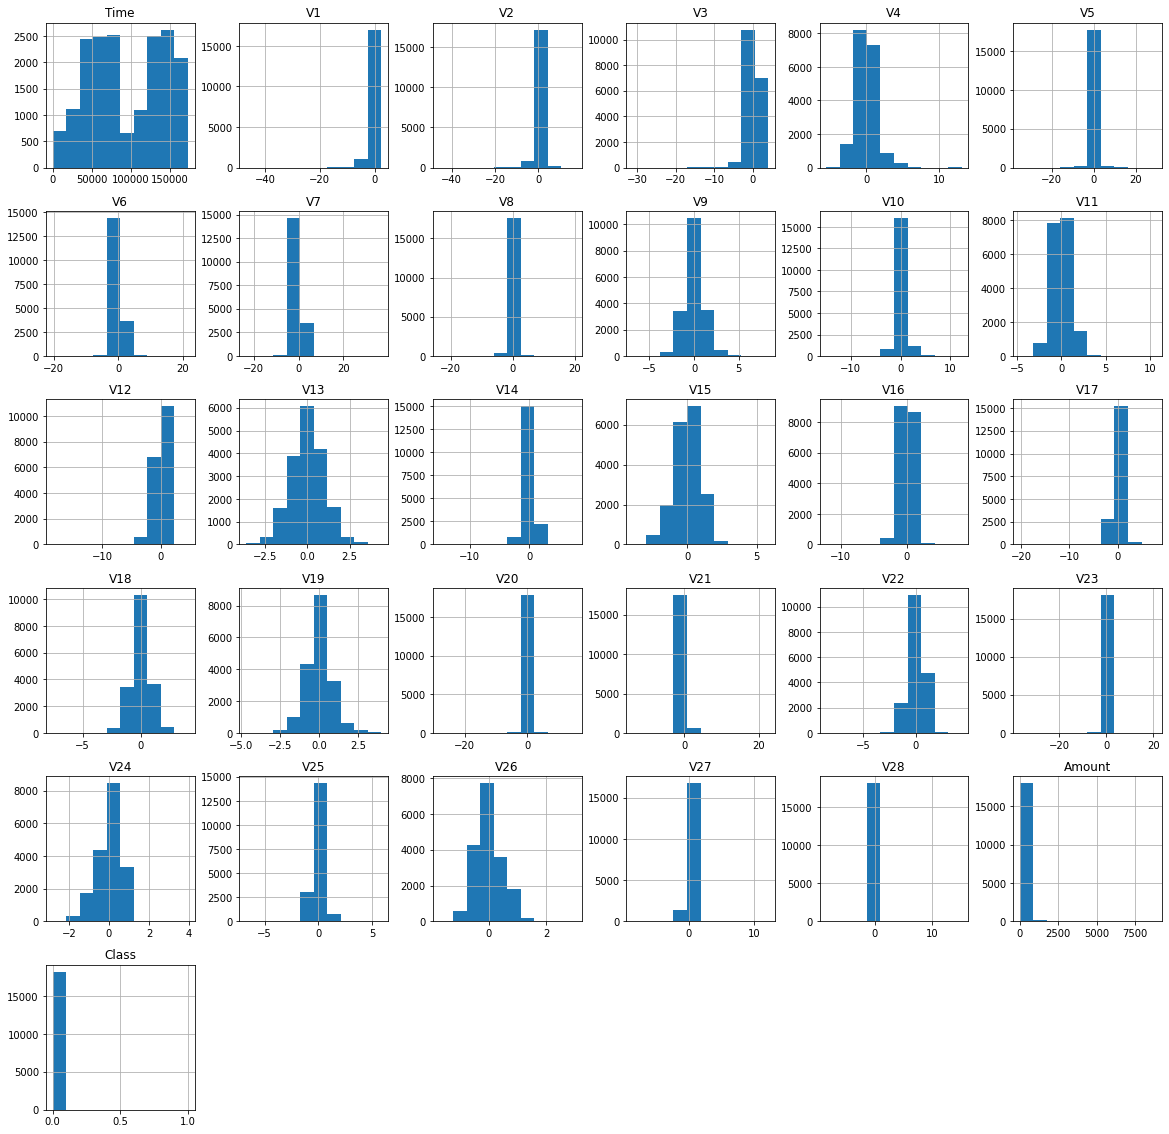

In [8]:
# Plotting histogram for each column

data.hist(figsize = (20,20))
plt.show()

In [11]:
# Determine number of fraud transactions

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))

print("Total fraud cases: ",len(fraud))
print("Total valid cases: ",len(valid))
print("Outlier Fraction: ",outlier_fraction)

Total fraud cases:  38
Total valid cases:  18190
Outlier Fraction:  0.0020890599230346343


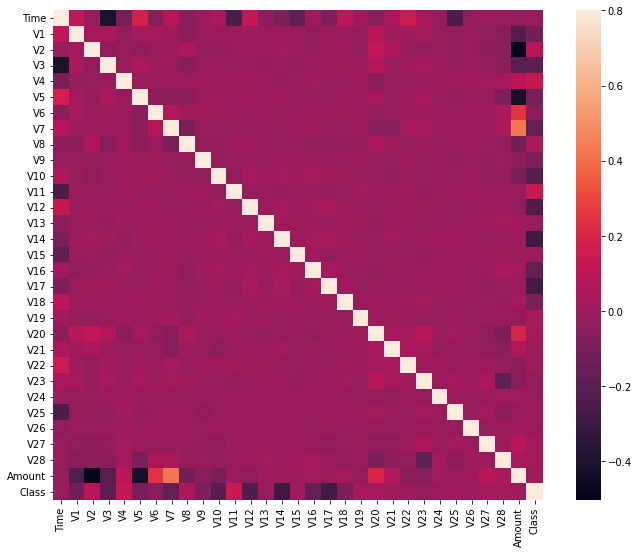

In [12]:
# Correlation matrix between columns

corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
# Removing target column

columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]
target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(18228, 30)
(18228,)


In [16]:
# Import models

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [17]:
# Define random state

state = 1

# Outlier detection models

classifiers = {
    "Isolation Forest" : IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor" : LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [20]:
# Fit the model

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # Fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape prediction values based on classes
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    print("{} : {}".format(clf_name, n_errors))
    print(accuracy_score(y_pred,Y))
    print(classification_report(y_pred,Y))

Isolation Forest : 55
0.9969826640333552
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18189
           1       0.29      0.28      0.29        39

    accuracy                           1.00     18228
   macro avg       0.64      0.64      0.64     18228
weighted avg       1.00      1.00      1.00     18228

Local Outlier Factor : 77
0.9957757296466974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18189
           1       0.00      0.00      0.00        39

    accuracy                           1.00     18228
   macro avg       0.50      0.50      0.50     18228
weighted avg       1.00      1.00      1.00     18228

